# Count-min sketch benchmark

__Count-min sketch__ is a probabilistic data structure that serves as a frequency table of events in stream of data.    
It's very effective especially to identify and retrieve __heavy hitters__.

In [7]:
from count_min_sketch import CountMinSketch
from count_min_sketch.benchmark import generate_data, benchmark
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [24]:
def plot_figure(title, xlabel, ylabel, x, y, markers=[], figsize=(15, 5)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.plot(x, y)
    for index in markers:
        plt.plot(x[index], x[index], marker='o', color='r')
    plt.show()

Let's explore Count-min sketch __absolute error__ and __error probability__.  
In order to do that, we need a reference data set that we know well. We will generate it by unsing ```generate_data``` method.

In [8]:
NB_OBSERVAIONS = 10 ** 3
MIN_FREQUENCY = 1
MAX_FREQUENCY = 100
MAX_SPLITS = 10

The ```generate_data``` method generates ```nb_observations``` of unique couples (observation, frequency) with   ```min_frequency``` <= frequency <= ```max_frequency```. These observations are then split to 1 to ```max_splits``` subdivisions (observation, sub-frequency) with sum of sub-frequencies = frequency.

In [9]:
data, description = generate_data(nb_observations=NB_OBSERVAIONS, 
                                  min_frequency=MIN_FREQUENCY, 
                                  max_frequency=MAX_FREQUENCY,
                                  max_splits=MAX_SPLITS)

Let's have a look at the first observation:

In [10]:
[(observation, frequency) for observation, frequency in data if observation == 0]

[(0, 44), (0, 4), (0, 8), (0, 1)]

In [11]:
description[0]

57

Now that we have the desired data set, let's evaluate our Count-min sketch.  
### 1. Effect of #rows:
Let's fix the number of columns and observe how error varies with ```nb_rows``` variations.

In [35]:
NB_COLUMNS = 500

In [36]:
nb_rows_range = [x for x in range(1, 21)]
error = [benchmark(nb_columns=NB_COLUMNS, 
                   nb_rows=nb_rows, 
                   data=data, 
                   description=description) for nb_rows in tqdm(nb_rows_range)]


/Users/mohamed-aminezghal/Documents/streaming_algorithms/code/venv3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


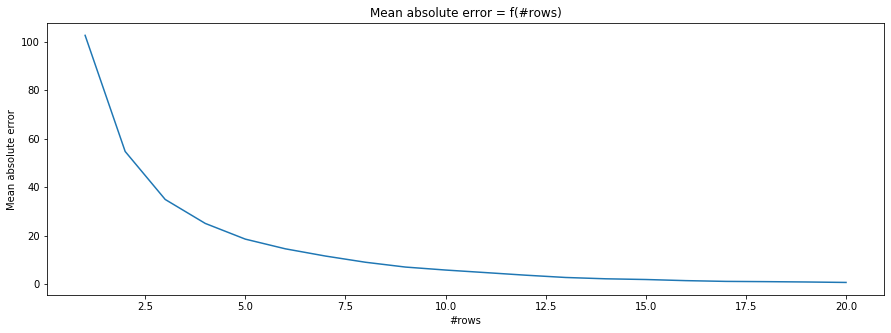

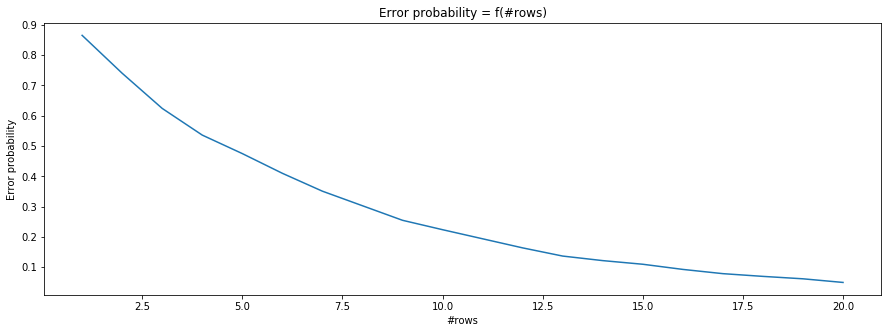

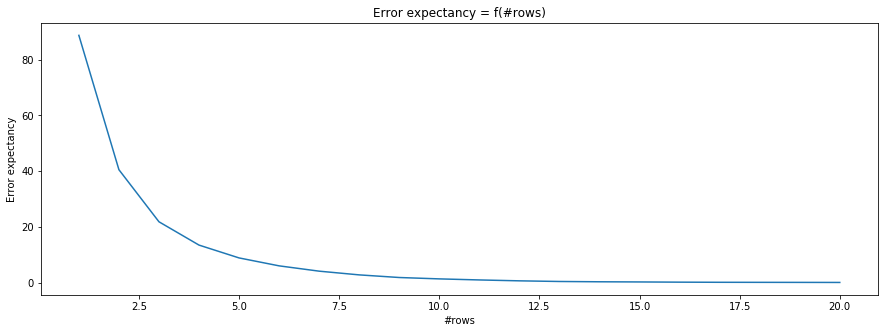

In [37]:
plot_figure(title="Mean absolute error = f(#rows)",
            xlabel="#rows", ylabel="Mean absolute error",
            x=nb_rows_range, y=[absolute_error for absolute_error, _ in error])

plot_figure(title="Error probability = f(#rows)",
            xlabel="#rows", ylabel="Error probability",
            x=nb_rows_range, y=[error_probability for _, error_probability in error])

plot_figure(title="Error expectancy = f(#rows)",
            xlabel="#rows", ylabel="Error expectancy",
            x=nb_rows_range, 
            y=[absolute_error * error_probability for absolute_error, error_probability in error])

### 2. Effect of #columns: 
Let's fix the number of rows and observe how error varies with ```nb_columns``` variations.

In [21]:
NB_ROWS = 5

In [22]:
nb_columns_range = [x for x in range(200, 1201)]
error = [benchmark(nb_columns=nb_columns, 
                   nb_rows=NB_ROWS, 
                   data=data, 
                   description=description) for nb_columns in tqdm(nb_columns_range)]

/Users/mohamed-aminezghal/Documents/streaming_algorithms/code/venv3.6.9/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


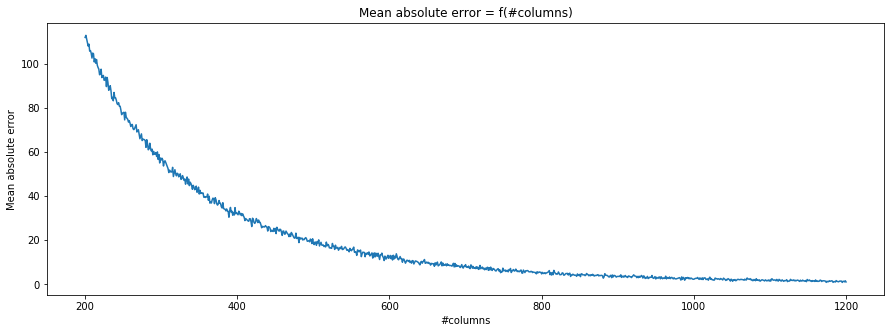

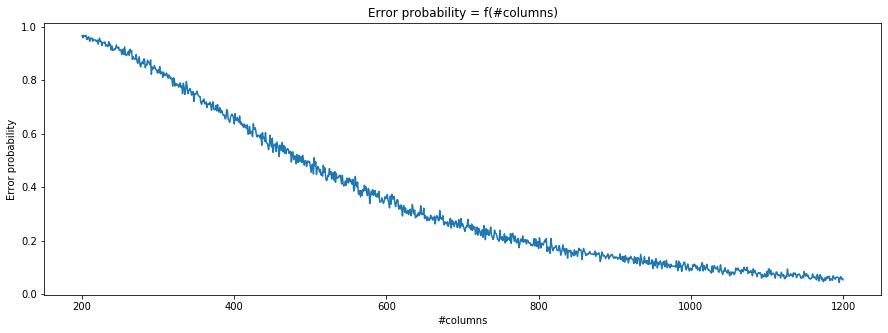

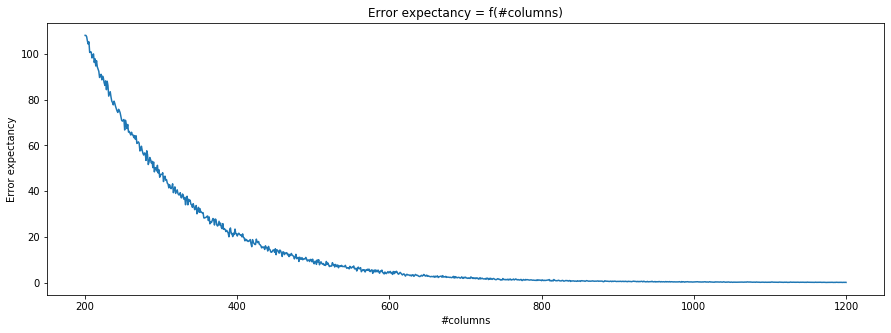

In [23]:
plot_figure(title="Mean absolute error = f(#columns)",
            xlabel="#columns", ylabel="Mean absolute error",
            x=nb_columns_range, y=[absolute_error for absolute_error, _ in error])

plot_figure(title="Error probability = f(#columns)",
            xlabel="#columns", ylabel="Error probability",
            x=nb_columns_range, y=[error_probability for _, error_probability in error])

plot_figure(title="Error expectancy = f(#columns)",
            xlabel="#columns", ylabel="Error expectancy",
            x=nb_columns_range, 
            y=[absolute_error * error_probability for absolute_error, error_probability in error])